In [1]:
from gait_analysis import *
import os
import cv2
import numpy as np
main_dir = os.getcwd()
exp_dir = 'comps'
leg_combos = get_leg_combos()
legs = np.array(leg_combos['legs_lateral'])

In [2]:
def get_gaitstyle_data(main_dir, exp_dir, data_dir):
    # get list of movie directories within experiment directory
    os.chdir(main_dir)
    os.chdir(os.path.join(main_dir,exp_dir,data_dir))
    movie_folders = selectMultipleFromList(listDirectories())
    all_experiment_data, total_frames = get_swing_combo_data(movie_folders, legs)
    return all_experiment_data, total_frames 

In [3]:
os.chdir(os.path.join(main_dir,exp_dir))
dir_list = listDirectories()
for it in dir_list:
    print(it)

group1
group2


In [4]:
# choose experiment directory below
data_dir_1 = 'group1' # from within exp_dir
data_1, frames_1 = get_gaitstyle_data(main_dir, exp_dir, data_dir_1)


Choose from this list (separate by commas if multiple choices): 
1: 2a036-047
2: 2c084-116
3: 2c050-062
4: 2c023-030
5: 2c005-019
6: 2b018-025
7: 2a025-033
8: 2b002-010
9: select ALL

Which number(s) do you want? 9

You chose them all

Found 2a036-047/mov_data.txt
Found 2c084-116/mov_data.txt
Found 2c050-062/mov_data.txt
Found 2c023-030/mov_data.txt
Found 2c005-019/mov_data.txt
Found 2b018-025/mov_data.txt
Found 2a025-033/mov_data.txt
Found 2b002-010/mov_data.txt


In [5]:
# get more data!
# choose experiment directory below
data_dir_2 = 'group2' # from within analyzed_movies
data_2, frames_2 = get_gaitstyle_data(main_dir, exp_dir, data_dir_2)


Choose from this list (separate by commas if multiple choices): 
1: 2a001-016
2: 2b007-024
3: 2b087-100
4: 2b064-081
5: 2a022-032
6: 2b030-055
7: select ALL

Which number(s) do you want? 7

You chose them all

Found 2a001-016/mov_data.txt
Found 2b007-024/mov_data.txt
Found 2b087-100/mov_data.txt
Found 2b064-081/mov_data.txt
Found 2a022-032/mov_data.txt
Found 2b030-055/mov_data.txt


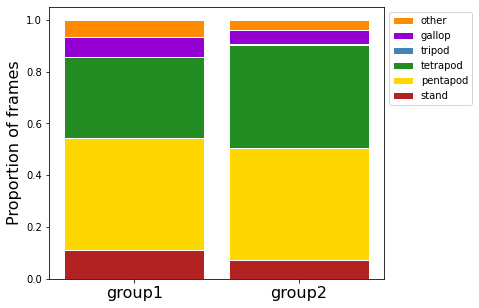

In [6]:
# compare gait categories between these two experiments
all_exp_name = [data_dir_1, data_dir_2]
all_exp_labels = all_exp_name
# all_exp_labels = ['control','20 uM caffeine']

all_cat_data = [get_proportions_in_swing_categories(data_1, frames_1)[1], 
                get_proportions_in_swing_categories(data_2, frames_2)[1]]

categories = get_proportions_in_swing_categories(data_1, frames_1)[0]

plot_colors = get_plot_colors(len(categories))
figwidth = 3 * len(all_exp_name)

fig = plt.figure(figsize = (figwidth,5))
ax = fig.add_subplot(111)
# see https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

# plot
barWidth = 0.85

for j, category_data in enumerate(all_cat_data):
    
    for i, category in enumerate(categories):
        if i == 0:
            bottom = 0
        else:
            bottom += category_data[i-1]
        
        if j == 0:
            plt.bar(j, category_data[i], bottom = bottom, color = plot_colors[i], 
                    edgecolor='white', width=barWidth, label=category)
        else:
            plt.bar(j, category_data[i], bottom = bottom, color = plot_colors[i], 
                    edgecolor='white', width=barWidth)

ax.set_xticks(np.arange(len(all_exp_name)))
ax.set_xticklabels(all_exp_labels, fontsize=16)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc='upper left',
          bbox_to_anchor=(1,1), ncol=1)

plt.ylabel('Proportion of frames', fontsize=16)
plt.show()

# make a plot of steps and swings, 
# with color code gait style below

In [7]:
# choose ONE clip to analyze
data_dir = data_dir_1
os.chdir(os.path.join(main_dir,exp_dir,data_dir))
clip_folder = selectOneFromList(listDirectories())
mov_data = os.path.join(clip_folder, 'mov_data.txt')
# get step times for each leg for which we have data
up_down_times, latest_event = getUpDownTimes(mov_data)
# quality control on up_down_times
qcUpDownTimes(up_down_times)
# plot steps - choose which legs to plot
legs = get_leg_combos()['legs_lateral']  # dictionary of all combos
# legs = ['L4','R4'] # to manually choose sets of lets

frame_times = get_frame_times(clip_folder)


Choose from this list : 
1: 2a025-033
2: 2a036-047
3: 2b002-010
4: 2b018-025
5: 2c005-019
6: 2c023-030
7: 2c050-062
8: 2c084-116

Which ONE do you want? 8

You chose 2c084-116

Found 2c084-116/mov_data.txt


In [8]:
# trim frame_times to only include frames up to last recorded event
last_event_frame = np.min(np.where(frame_times > latest_event*1000))
frame_times_with_events = frame_times[:last_event_frame]

# get leg matrix
leg_matrix = make_leg_matrix(legs, up_down_times, frame_times_with_events)
legs = np.array(legs)
print(np.shape(leg_matrix))

(6, 937)


In [9]:
# get colors for different leg combos ... stupidly
def get_leg_combo_colors():
    
    swing_categories = get_swing_categories() # this is 'contralateral pairs' etc.
    plot_colors = get_plot_colors(len(swing_categories))
    swing_category_colors = dict(zip(categories, plot_colors))
    
    leg_combo_colors = {}
    leg_combo_colors['stand'] = swing_category_colors['stand']
    leg_combo_colors['other'] = swing_category_colors['other']
    for category in swing_categories['contralateral adjacents']:
        leg_combo_colors[category] = swing_category_colors['tetrapod']
    for category in swing_categories['contralateral pairs']:
        leg_combo_colors[category] = swing_category_colors['gallop']
    for category in swing_categories['ipsilateral adjacents']:
        leg_combo_colors[category] = swing_category_colors['other']
    for category in swing_categories['ipsilateral skips']:
        leg_combo_colors[category] = swing_category_colors['other']
    for category in swing_categories['single legs']:
        leg_combo_colors[category] = swing_category_colors['pentapod']
    for category in swing_categories['tripod']:
        leg_combo_colors[category] = swing_category_colors['tripod']
    for category in swing_categories['no legs']:
        leg_combo_colors[category] = swing_category_colors['stand']
    return leg_combo_colors

# make a vector of COLORS from swings in leg matrix ... stupidly
def make_swing_color_vector(leg_matrix, leg_combo_colors):

    swing_color_vector = []

    for col_ind in np.arange(np.shape(leg_matrix)[1]):
        one_indices = np.where(leg_matrix[:, col_ind] == 1)
        swinging_legs = legs[one_indices]
        swinging_leg_key = '_'.join(sorted(swinging_legs))
        if len(swinging_leg_key) > 0:
            if swinging_leg_key in leg_combo_colors.keys():
                swing_color_vector.append(leg_combo_colors[swinging_leg_key])
            else: 
                swing_color_vector.append(leg_combo_colors['other'])
        else:
            swing_color_vector.append(leg_combo_colors['stand'])
            
    return swing_color_vector

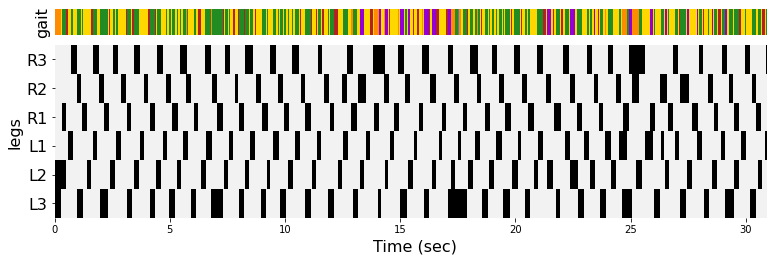

In [10]:
swing_color_vector = make_swing_color_vector(leg_matrix, get_leg_combo_colors())

# this takes a bit . . . (10 s) ... see below for another approach (messier, maybe quicker?)

step_color = [0.95, 0.95, 0.95]
swing_color = [0, 0, 0]

# definitions for the axes
# left, bottom, width, height
rect_steps = [0.07, 0.07,  1, 0.6]
rect_gaits = [0.07, 0.70,  1, 0.1]

stepplot_colors = {1:swing_color, 0: step_color}
gait_x = frame_times_with_events/1000

fig_height = int(len(legs) * 0.7)
fig = plt.figure(figsize=(10,fig_height))
steps = plt.axes(rect_steps)

bar_width = gait_x[1] - gait_x[0]                 

for i, leg in enumerate(legs):
    for j, x in enumerate(gait_x):
        steps.barh(i+1, bar_width, height=1, left=j*bar_width, 
                color = stepplot_colors[leg_matrix[i, j]])

steps.set_ylim([0.5, len(legs)+0.5])
steps.set_xlabel('Time (sec)', fontsize=16)
steps.set_yticks(np.arange(len(legs))+1)
steps.set_yticklabels(legs, fontsize=16)
steps.set_ylabel('legs', fontsize=16)
steps.set_frame_on(False)

gaits = plt.axes(rect_gaits)

for i,x in enumerate(gait_x):
    gaits.barh(1, bar_width, height=0.8, left=i*bar_width, color = swing_color_vector[i])

gaits.set_ylabel('gait', fontsize=16)

gaits.set_xlim([0, gait_x[-1]])
steps.set_xlim([0, gait_x[-1]])

gaits.set_yticks([])
gaits.set_xticks([])
gaits.set_frame_on(False)

plt.show()

In [ ]:
# trying a different way to plot these bars . . . 

# print(len(swing_color_vector))
# test_slice = swing_color_vector
# gait_x = frame_times_with_events/1000
# bar_width = gait_x[1] - gait_x[0]

# # print(test_slice)
# i = 0
# current_col = test_slice[0]
# working_slice = test_slice
# left_edge = 0

# while len(working_slice) > 0:
#     # check to see if more than one kind of thing in working array
#     if len(np.unique(working_slice)) > 1:
#         next_color_ind = np.where(working_slice != current_col)[0][0]
#         plotting_slice = working_slice[:next_color_ind]
#         working_slice = working_slice[next_color_ind:]
#         current_col = working_slice[0]        
#     else:
#         plotting_slice = working_slice
#         working_slice = []
        
#     plt.barh(1, len(plotting_slice) * bar_width, height = 0.8, left = left_edge, color = plotting_slice[0])
#     left_edge += len(plotting_slice) * bar_wid